In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
print("num of rows: ", num_rows, ";", "num of cols: ", num_cols)

num of rows:  51392 ; num of cols:  154


In [4]:
#Provide a set of column names that have no missing values.
no_nulls = set(df.columns[df.isnull().mean()==0])
print(no_nulls)

{'University', 'Professional', 'Respondent', 'ProgramHobby', 'FormalEducation', 'Country', 'EmploymentStatus'}


In [5]:
#Provide a set of column name that have more than 75% if their values missing.
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
print(most_missing_cols)

{'ExCoderBalance', 'ExCoderWillNotCode', 'ExCoderBelonged', 'WebDeveloperType', 'ExCoderSkills', 'ExCoder10Years', 'ExCoderNotForMe', 'ExCoderActive', 'TimeAfterBootcamp', 'ExCoderReturn', 'ExpectedSalary', 'MobileDeveloperType', 'YearsCodedJobPast', 'NonDeveloperType'}


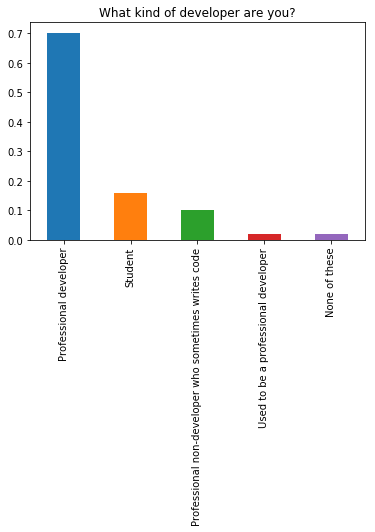

In [6]:
#Provide a pandas series of the counts for each Professional status
status_vals = df.Professional.value_counts()
(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What kind of developer are you?");

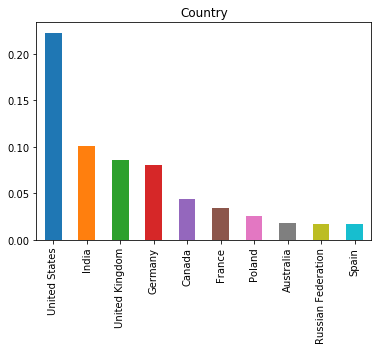

In [7]:
#Provide a pandas series of the counts for each Country
count_vals = df.Country.value_counts()

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

In [17]:
country_salary = pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')").groupby(['Country']).mean()['Salary']).sort_values(by='Salary', ascending=False)
list(country_salary.index)

['Virgin Islands (USA)',
 'U.S. Minor Outlying Islands',
 'Uganda',
 'Kuwait',
 'United States',
 'Liechtenstein',
 'Switzerland',
 'Iceland',
 'Guam',
 'Bahrain',
 'Norway',
 'Puerto Rico',
 'Guinea',
 'Australia',
 'Israel',
 'Nicaragua',
 'Denmark',
 'New Zealand',
 'Ireland',
 'Albania',
 'Canada',
 'Cayman Islands',
 'Thailand',
 'United Kingdom',
 'Germany',
 'Cyprus',
 'Netherlands',
 'Sweden',
 'Guatemala',
 'Ghana',
 'Luxembourg',
 'Austria',
 'Finland',
 'Singapore',
 'Hong Kong',
 'France',
 'Uruguay',
 'South Korea',
 'Japan',
 'Belgium',
 'China',
 'Costa Rica',
 'I prefer not to say',
 'Macedonia',
 'Madagascar',
 'Spain',
 'South Africa',
 'Latvia',
 'Uzbekistan',
 'Italy',
 'Estonia',
 'New Caledonia (French)',
 'United Arab Emirates',
 'Barbados',
 'Malta',
 'Slovenia',
 'Bangladesh',
 'Argentina',
 'Peru',
 'Belarus',
 'Martinique (French)',
 'Venezuela',
 'Panama',
 'Greece',
 'Serbia',
 'Saudi Arabia',
 'Croatia',
 'Hungary',
 'Ecuador',
 'Bulgaria',
 'Ukraine',
 'S

In [42]:
#Define some countries to western and eastern
western = ['United States', 'Liechtenstein', 'Switzerland', 
           'Iceland', 'Norway', 'Israel', 'Denmark', 
           'Ireland', 'Canada', 'United Kingdom', 'Germany', 
           'Netherlands', 'Sweden', 'Luxembourg', 'Austria', 
           'Finland', 'France', 'Belgium', 'Spain', 'Italy',
           'Poland']

eastern = ['Thailand', 'Singapore', 'Hong Kong', 
           'South Korea', 'Japan', 'China', 
           'Taiwan', 'Malaysia', 'India', 
           'Indonesia', 'Vietnam']

In [44]:
#Add a new catagory seperating to western and eastern
df['west_or_east'] = df['Country'].apply(lambda x: 'western' if x in western else ('eastern' if x in eastern else 'other'))

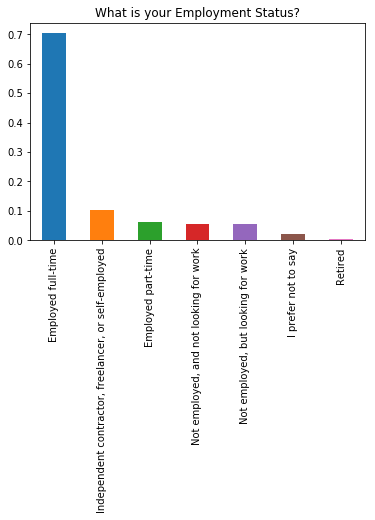

In [45]:
#Provide a pandas series of the counts for each Employment status
employment_status_vals = df.EmploymentStatus.value_counts()
(employment_status_vals/df.shape[0]).plot(kind="bar");
plt.title("What is your Employment Status?");

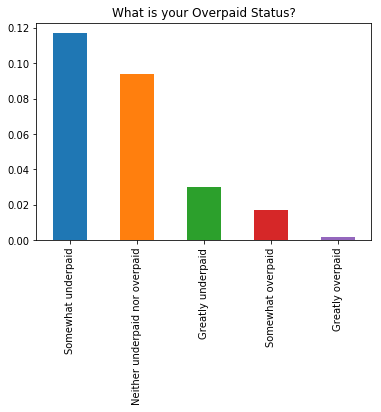

In [51]:
#Provide a pandas series of the counts for each Overpaid status
overpaid_status_vals = df.Overpaid.value_counts()
(overpaid_status_vals/df.shape[0]).plot(kind="bar");
plt.title("What is your Overpaid Status?");

In [53]:
useful_columns = ['Country', 'EmploymentStatus', 'CareerSatisfaction', 'JobSatisfaction', 'JobSeekingStatus', 'HoursPerWeek', 'Salary', 'west_or_east', 'Overpaid']
useful_df = pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female') and EmploymentStatus == 'Employed full-time'"))[useful_columns]
useful_df.head()

,Country,EmploymentStatus,CareerSatisfaction,JobSatisfaction,JobSeekingStatus,HoursPerWeek,Salary,west_or_east,Overpaid
2,United Kingdom,Employed full-time,8.0,9.0,NaN,NaN,113750.0,western,Neither underpaid nor overpaid
7,Poland,Employed full-time,7.0,7.0,"I'm not actively looking, but I am open to new...",1.0,NaN,western,NaN
8,Colombia,Employed full-time,6.0,6.0,I am not interested in new job opportunities,2.0,NaN,other,Neither underpaid nor overpaid
13,Germany,Employed full-time,8.0,6.0,I am actively looking for a job,3.0,NaN,western,NaN
14,United Kingdom,Employed full-time,8.0,8.0,NaN,NaN,100000.0,western,Somewhat underpaid


In [54]:
comparison = useful_df.groupby(['west_or_east']).mean().sort_values(by='Salary', ascending=False)
comparison

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,Salary
west_or_east,,,,
western,7.589983,7.135169,2.179504,69830.167582
other,7.480379,6.952474,3.048918,29013.802405
eastern,6.853249,6.224898,5.512551,15439.177552


Text(0,0.5,'Job Satisfaction')

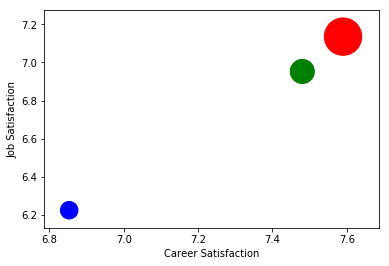

In [61]:
plt.scatter(comparison.CareerSatisfaction, comparison.JobSatisfaction, comparison.Salary/50, c=['red','green','blue'])
plt.xlabel('Career Satisfaction')
plt.ylabel('Job Satisfaction')